# Wine Embeddings and a Wine Recommender


In [ ]:
import pandas as pd

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Step 0. Подключение и обработка датасета от парсеров winestyle

In [ ]:
# https://drive.google.com/file/d/1O9FbG4QbJhSDOiYNcitJQocRzjFPxlb4/view?usp=sharing
id = '1O9FbG4QbJhSDOiYNcitJQocRzjFPxlb4' 
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('winestyle.csv')  
winestyle = pd.read_csv('winestyle.csv', index_col = 'id')

In [ ]:
winestyle = winestyle.drop(columns=['url','image_url','strength'])

In [ ]:
winestyle.head(40)

,id,name,type,crop_year,manufacturer,brand,price,volume,rating,country,region,color,grape,sugar,description
0,116,"""Chateau Les Jouberts"" Cuvee Prestige, Blaye C...",Вино,2014.0,Les Vignerons de Tutiac,Chateau Les Jouberts,946.0,0.75,3.70,Франция,"Бордо, Кот де Блай",Красное,Мерло,Сухое,"Вино демонстрирует сложный аромат, сотканный и..."
1,117,"Ramirez de la Piscina, Crianza, Rioja DOCa, 2015",Вино,2015.0,Ramirez de la Piscina,NaN,1495.0,0.75,4.10,Испания,Риоха,Красное,Темпранильо,Сухое,"В глубоком аромате вина ноты вишни, сливы и еж..."
2,118,"Ramirez de la Piscina, Reserva, Rioja DOCa, 2014",Вино,2014.0,Ramirez de la Piscina,NaN,2100.0,0.75,4.20,Испания,Риоха,Красное,Темпранильо,Сухое,Элегантный аромат вина раскрывается оттенками ...
3,119,"Rafael Cambra, Soplo, Valencia DO, 2014",Вино,2014.0,Rafael Cambra,NaN,904.0,0.75,3.70,Испания,Валенсия,Красное,Гренаш/Гарнача,Сухое,"Вино демонстрирует элегантный, сдержанный аром..."
4,120,"Familia Bastida, ""Drama"" Red Blend, La Mancha ...",Вино,2015.0,Bodegas Bastida,NaN,975.0,0.75,3.70,Испания,Ла Манча,Красное,"Гренаш/Гарнача, Темпранильо",Сухое,"Вино демонстрирует глубокий аромат, сотканный ..."
5,121,"""Chopo"" Monastrell Rose, Jumilla DOP, 2018",Вино,2018.0,Alceno,NaN,1375.0,0.75,3.65,Испания,"Мурсия, Хумилья",Розовое,Монастрель,Сухое,Вино обладает освежающим ароматом с доминирующ...
6,122,"Fattoria Selvapiana, ""Vigneto Bucerchiale"" Chi...",Вино,2013.0,Fattoria Selvapiana,NaN,2475.0,0.75,3.05,Италия,"Тоскана, Кьянти",Красное,Санджовезе,Сухое,"Вино демонстрирует сложный, богатый аромат, со..."
7,123,"Familia Bastida, ""Finca el Lince"" Red Blend, J...",Вино,2017.0,Bodegas Bastida,NaN,1201.0,0.75,4.05,Испания,"Мурсия, Хумилья",Красное,"Сира, Монастрель",Сухое,"У вина гармоничный, изящный аромат с нотами яг..."
8,124,"Terra d'Uro, ""Finca la Rana"" Toro DO, 2014",Вино,2014.0,Terra d'Uro,NaN,1465.0,0.75,3.00,Испания,Торо,Красное,Темпранильо,Сухое,Вино чарует элегантным ароматом с доминирующим...
9,125,"Bodega La Magdalena, ""Sueno"" Tempranillo, Ribe...",Вино,2015.0,Vega Moragona,NaN,1344.0,0.75,5.00,Испания,"Кастилия Ла Манча, Рибера дель Хука",Красное,Темпранильо,Сухое,Выразительный аромат вина изобилует оттенками ...


In [ ]:
winestyle.groupby(['type']).describe()

crop_year                          ... rating           
                            count         mean        std  ...    50%   75%  max
type                                                       ...                  
Вермут                        1.0  1757.000000        NaN  ...  4.500  5.00  5.0
Винный напиток                0.0          NaN        NaN  ...  4.125  5.00  5.0
Вино                      24225.0  2013.489618  14.877865  ...  4.000  4.50  5.0
Десертное                    28.0  2003.750000  11.054160  ...  4.500  4.75  5.0
Игристое                    487.0  2008.722793  27.985872  ...  4.050  4.55  5.0
Игристый винный напиток       0.0          NaN        NaN  ...    NaN   NaN  NaN
Кошерное                     34.0  2014.352941   4.898252  ...  3.250  4.00  4.5
Крепленое                    34.0  1987.647059  27.614096  ...  4.125  4.65  5.0
Плодовое                      0.0          NaN        NaN  ...  4.250  5.00  5.0
Портвейн                    125.0  2001.232000  20.616755  ...  4.150  4.65  5.0
Сухое                         3.0  2009.333333   2.081666  ...    NaN   NaN  NaN
Херес                         8.0  1985.500000  17.848569  ...  4.000  4.65  5.0
Шампанское                  398.0  2008.876884  61.714443  ...  4.400  5.00  5.0

[13 rows x 32 columns]

In [ ]:
winestyle['description'] = winestyle['aroma'] + ' ' + winestyle['taste'] + ' ' + winestyle['description']
winestyle = winestyle.drop(columns=['aroma','taste','food_pairing'])

In [ ]:
winestyle.head()

,name,type,crop_year,manufacturer,brand,price,volume,rating,country,region,color,grape,sugar,description
id,,,,,,,,,,,,,,
116,"""Chateau Les Jouberts"" Cuvee Prestige, Blaye C...",Вино,2014.0,Les Vignerons de Tutiac,Chateau Les Jouberts,946.0,0.75,3.7,Франция,"Бордо, Кот де Блай",Красное,Мерло,Сухое,"Вино демонстрирует сложный аромат, сотканный и..."
117,"Ramirez de la Piscina, Crianza, Rioja DOCa, 2015",Вино,2015.0,Ramirez de la Piscina,NaN,1495.0,0.75,4.1,Испания,Риоха,Красное,Темпранильо,Сухое,"В глубоком аромате вина ноты вишни, сливы и еж..."
118,"Ramirez de la Piscina, Reserva, Rioja DOCa, 2014",Вино,2014.0,Ramirez de la Piscina,NaN,2100.0,0.75,4.2,Испания,Риоха,Красное,Темпранильо,Сухое,Элегантный аромат вина раскрывается оттенками ...
119,"Rafael Cambra, Soplo, Valencia DO, 2014",Вино,2014.0,Rafael Cambra,NaN,904.0,0.75,3.7,Испания,Валенсия,Красное,Гренаш/Гарнача,Сухое,"Вино демонстрирует элегантный, сдержанный аром..."
120,"Familia Bastida, ""Drama"" Red Blend, La Mancha ...",Вино,2015.0,Bodegas Bastida,NaN,975.0,0.75,3.7,Испания,Ла Манча,Красное,"Гренаш/Гарнача, Темпранильо",Сухое,"Вино демонстрирует глубокий аромат, сотканный ..."


## Step 1. Нормализация

Загружаем переведенный descriptor_mapping_ru

In [ ]:
#descriptor mapping rus
#https://drive.google.com/file/d/1jDN0iwcLrWFLEJbedy6DiZi2gz09MMyR/view?usp=sharing
#descriptor mapping rus norm
# https://drive.google.com/file/d/1-6TwyJIlJk5S-hYgiUAuqemXMeyPIZG6/view?usp=sharing
id = '1-6TwyJIlJk5S-hYgiUAuqemXMeyPIZG6' 
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('descriptor_mapping_ru.csv')  
descriptor_mapping_ru = pd.read_csv('descriptor_mapping_ru.csv', sep=';')

Загружаем корпусы слов и знаков препинания, импортируем библиотеки

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

Класс для нормализации строк: удаляет стоп-слова и пунктуацию, использует стеммер для удаления лишних суффиксов и окончаний

In [ ]:
class Normalizer:

    def __init__(self, lang='russian'):
        self.stemmer = SnowballStemmer(lang)
        self.stop = stopwords.words(lang)
    
    def normalise_description(self, description, to_string=False):
        description = str(description)
        description = description.replace('-', ' ')
        tokens = word_tokenize(description.lower())
        normalised_tokens = [self.stemmer.stem(w) for w in tokens if w.isalpha() and w not in self.stop]
        return normalised_tokens if not to_string else ' '.join(normalised_tokens)

In [ ]:
norm = Normalizer()
norm.normalise_description('соя')
#norm.normalise_description(test_description, to_string=True)

['со']

Создаём нормализованный descriptor mapping ru

In [ ]:
def create_norm_descriptor_mapping():
    norm = Normalizer()
    for column in descriptor_mapping_ru.columns:
      for i in range(len(descriptor_mapping_ru)):
        # if descriptor_mapping_ru[column][i].find('-') != -1:
        #   print(descriptor_mapping_ru[column][i])
        descriptor_mapping_ru[column][i] = norm.normalise_description(descriptor_mapping_ru[column][i], to_string=True)
    descriptor_mapping_ru.to_csv('descriptor_mapping_ru_norm.csv')

In [ ]:

# create_norm_descriptor_mapping()
descriptor_mapping_ru.head()

,Unnamed: 0,level_1,level_2,level_3,raw_descriptor
0,0,кислотн,высок кислотн,кислотн,кислотн
1,1,кислотн,высок кислотн,агрессивн,агрессивн
2,2,кислотн,высок кислотн,напорист,напорист
3,3,кислотн,высок кислотн,ярк,ярк
4,4,кислотн,высок кислотн,яркост,яркост


## Step 2. Создание и подгрузка корпуса слов

Создаем единый файл со всеми описаниями (корпус)

In [ ]:
def create_corpus(descriptions):
    norm = Normalizer()
    with open('corpus_winestyle.txt', 'w') as corpus_file:
        for d in descriptions:
            print(norm.normalise_description(d, to_string=True), file=corpus_file)

In [ ]:
# corpus_winestyle, winestyle_filtered подгружаются с диска
pre_created = True

На основе этого корпуса создаем модели биграмм и триграмм, встречающихся хотя бы 10 раз, сохраняем модели в соответствующие файлы

In [ ]:
from gensim.test.utils import datapath
from gensim.models.word2vec import Text8Corpus
from gensim.models.phrases import Phrases, Phraser

In [ ]:
%%capture
if (not pre_created):
    create_corpus(winestyle['description'])
    sentences = Text8Corpus('corpus_winestyle.txt')
    phrases = Phrases(sentences, min_count=10, threshold=1)
else:
    id_corpus_winestyle = '1U61JUm1zbgJnRS8U3cKbNt9KDkOpsLWr'
    # https://drive.google.com/file/d/1U61JUm1zbgJnRS8U3cKbNt9KDkOpsLWr/view?usp=sharing
    downloaded = drive.CreateFile({'id':id_corpus_winestyle}) 
    downloaded.GetContentFile('corpus_winestyle.txt')  
    sentences = Text8Corpus('corpus_winestyle.txt')

## Step 3. Word2Vec

In [ ]:
from gensim.models import Word2Vec
file_object=open("corpus_winestyle.txt","r")
data = Text8Corpus('corpus_winestyle.txt')
word2vec = Word2Vec(data, size=300)

# wine_word2vec_model = Word2Vec(sentences, size=300, min_count=1, iter=15)

# wine_word2vec_model.save('wine_word2vec_model.bin')

In [ ]:
from difflib import get_close_matches

descriptors = descriptor_mapping_ru['raw_descriptor']

def count_matches(word, string, method='count'):
    if method == 'fuzzy':
        return len(get_close_matches(word, string, cutoff=0.8))
    elif method == 'count':
        return ' '.join(string).count(word)

def map_descriptors(normalised_description, level='raw_descriptor'):
    descriptorised_description = {}
    for i, word in enumerate(descriptors):
        count = count_matches(word, normalised_description)
        if count:
            descriptorised_description[descriptor_mapping_ru[level][i]] = count
    return descriptorised_description

In [ ]:
description = winestyle['description'][116]

norm = Normalizer()
normalised_description = norm.normalise_description(description)
print(description)
print(normalised_description)

map_descriptors(normalised_description, level='level_3')

Вино демонстрирует сложный аромат, сотканный из нот черной смородины, ванили, кокоса, розмарина и гвоздики. Вино обладает щедрым, ярким вкусом с оттенками черешни, кофе и трюфелей, с мягкими танинами и долгим, приятным послевкусием. "Chateau Les Jouberts" Cuvee Prestige, Blaye Cotes de Bordeaux AOC, 2014 — красное сухое вино, созданное из винограда сорта Мерло, который произрастает на виноградниках в аппелласьоне Блай Кот де Бордо на глинисто-гравийных почвах. Сбор урожая проводится лишь по достижении ягод оптимальной спелости, винификация сусла проходит при строго контролируемой температуре в резервуарах из нержавеющей стали. Выдерживается вино 12 месяцев в бочках из французского дуба. Потенциал вина составляет 5 лет.
['вин', 'демонстрир', 'сложн', 'аромат', 'сотка', 'нот', 'черн', 'смородин', 'ван', 'кокос', 'розмарин', 'гвоздик', 'вин', 'облада', 'щедр', 'ярк', 'вкус', 'оттенк', 'черешн', 'коф', 'трюфел', 'мягк', 'танин', 'долг', 'приятн', 'послевкус', 'chatea', 'les', 'jouberts', '

{'ван': 1,
 'виноград': 1,
 'гвоздик': 1,
 'глин': 1,
 'грав': 1,
 'дер': 1,
 'дик': 1,
 'долг': 1,
 'дуб': 1,
 'кокос': 1,
 'коф': 1,
 'лад': 1,
 'мягк': 1,
 'мягк танин': 1,
 'пот': 1,
 'ржав': 1,
 'роз': 1,
 'розмарин': 1,
 'сложн': 1,
 'смородин': 1,
 'сот': 1,
 'спел': 1,
 'средн': 1,
 'стал': 1,
 'суглинок': 1,
 'сух': 1,
 'танин': 1,
 'тим': 1,
 'трюфел': 1,
 'французск дуб': 1,
 'черн смородин': 1,
 'щедр': 1,
 'ягод': 1,
 'ярк': 1}

In [ ]:
descriptor_mapping_ru['level_3'].value_counts()

яблок         11
дуб           11
коф            8
вишн           7
стал           7
              ..
зел фасол      1
помадк         1
ветчин         1
опилк          1
лемонграсс     1
Name: level_3, Length: 564, dtype: int64

Записываем в датасет нормализованные описания, которые также отфильтрованы через дескрипторы

In [ ]:
def return_descriptor_from_mapping(desc):
    normalised_description = norm.normalise_description(desc)
    description_to_return = ''
    map = map_descriptors(normalised_description, level='level_3')
    for key in map.keys():
        words = ''
        for i in range(map.get(key)):
            words += key + ' '
        words = words.rstrip(' ')
        description_to_return += words + ' '
    description_to_return = description_to_return.rstrip(' ')
    return description_to_return
        
if not pre_created:
    for id in winestyle.index:
        winestyle.loc[id, 'description'] = return_descriptor_from_mapping(winestyle['description'][id])
    winestyle.to_csv('winestyle_filtered.csv')
    winestyle_filtered = pd.read_csv('winestyle_filtered.csv', index_col = 'id')
else:
    # https://drive.google.com/file/d/1wTNzilsOszlgRRiSXnOlvI_IWWtisxqs/view?usp=sharing
    id = '1wTNzilsOszlgRRiSXnOlvI_IWWtisxqs' 
    downloaded = drive.CreateFile({'id':id}) 
    downloaded.GetContentFile('winestyle_filtered.csv')  
    winestyle_filtered = pd.read_csv('winestyle_filtered.csv', index_col = 'id')

In [ ]:
winestyle_filtered['description'][116]

'ярк дик пот сот сложн щедр мягк спел стал глин грав трюфел суглинок долг средн роз черн смородин смородин ягод виноград гвоздик сух ржав танин мягк танин розмарин тим кокос французск дуб дуб ван дер коф лад'

In [ ]:
winestyle_filtered['description'][116]

'ярк дик пот сот сложн щедр мягк спел стал глин грав трюфел суглинок долг средн роз черн смородин смородин ягод виноград гвоздик сух ржав танин мягк танин розмарин тим кокос французск дуб дуб ван дер коф лад'

## Step 4. Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from operator import itemgetter
vectorizer = TfidfVectorizer()
X = vectorizer.fit(winestyle_filtered['description'].values.astype('U'))

dict_of_tfidf_weightings = dict(zip(X.get_feature_names(), X.idf_))

wine_review_vectors = []
notfound = []
for i, d in enumerate(winestyle_filtered['description'].values.astype('U')):
    descriptor_count = 0
    weighted_review_terms = []
    terms = d.split(' ')
    for term in terms:
        if term in dict_of_tfidf_weightings.keys():
            tfidf_weighting = dict_of_tfidf_weightings[term]
            try:
                word_vector = word2vec.wv.get_vector(term).reshape(1, 300)
            except:
                notfound.append(term)
            weighted_word_vector = tfidf_weighting * word_vector
            weighted_review_terms.append(weighted_word_vector)
            descriptor_count += 1
        else:
            continue
    try:
        review_vector = sum(weighted_review_terms)/len(weighted_review_terms)
    except:
        review_vector = []
    vector_and_count = [terms, review_vector, descriptor_count, i]
    wine_review_vectors.append(vector_and_count)

winestyle_upgrade = winestyle.copy()
winestyle_upgrade['normalized_descriptors'] = list(map(itemgetter(0), wine_review_vectors))
winestyle_upgrade['review_vector'] = list(map(itemgetter(1), wine_review_vectors))
winestyle_upgrade['descriptor_count'] = list(map(itemgetter(2), wine_review_vectors))

winestyle.reset_index(inplace=True)
winestyle_upgrade.head()

,name,type,crop_year,manufacturer,brand,price,volume,rating,country,region,color,grape,sugar,description,normalized_descriptors,review_vector,descriptor_count
id,,,,,,,,,,,,,,,,,
116,"""Chateau Les Jouberts"" Cuvee Prestige, Blaye C...",Вино,2014.0,Les Vignerons de Tutiac,Chateau Les Jouberts,946.0,0.75,3.7,Франция,"Бордо, Кот де Блай",Красное,Мерло,Сухое,"Вино демонстрирует сложный аромат, сотканный и...","[ярк, дик, пот, сот, сложн, щедр, мягк, спел, ...","[[-0.3264205, -1.3763759, 0.58323157, 1.393026...",37
117,"Ramirez de la Piscina, Crianza, Rioja DOCa, 2015",Вино,2015.0,Ramirez de la Piscina,NaN,1495.0,0.75,4.1,Испания,Риоха,Красное,Темпранильо,Сухое,"В глубоком аромате вина ноты вишни, сливы и еж...","[полнотел, полнотел, полн, полн, вес, вес, глу...","[[0.09137841, -0.943621, 0.5496439, 0.91344106...",33
118,"Ramirez de la Piscina, Reserva, Rioja DOCa, 2014",Вино,2014.0,Ramirez de la Piscina,NaN,2100.0,0.75,4.2,Испания,Риоха,Красное,Темпранильо,Сухое,Элегантный аромат вина раскрывается оттенками ...,"[кислотн, чист, кисл, полнотел, полнотел, полн...","[[0.3140752, -0.8476911, 0.6367394, 0.6446014,...",45
119,"Rafael Cambra, Soplo, Valencia DO, 2014",Вино,2014.0,Rafael Cambra,NaN,904.0,0.75,3.7,Испания,Валенсия,Красное,Гренаш/Гарнача,Сухое,"Вино демонстрирует элегантный, сдержанный аром...","[элегантн, легкотел, пот, сот, мягк, пол, спел...","[[0.5350989, -0.43372536, 0.91756445, 1.476530...",26
120,"Familia Bastida, ""Drama"" Red Blend, La Mancha ...",Вино,2015.0,Bodegas Bastida,NaN,975.0,0.75,3.7,Испания,Ла Манча,Красное,"Гренаш/Гарнача, Темпранильо",Сухое,"Вино демонстрирует глубокий аромат, сотканный ...","[сильноалкогольн, полнотел, полн, сочн, вес, с...","[[-0.37903464, -1.449901, 0.8036676, 1.6158563...",41


In [ ]:
import numpy as np

wine_review_vectors = [w for w in wine_review_vectors if w[2] > 5]

X_train = np.array([w[1].flatten() for w in wine_review_vectors])
np.random.shuffle(X_train)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
link = linkage(X_train[:100], method='ward', metric='euclidean')

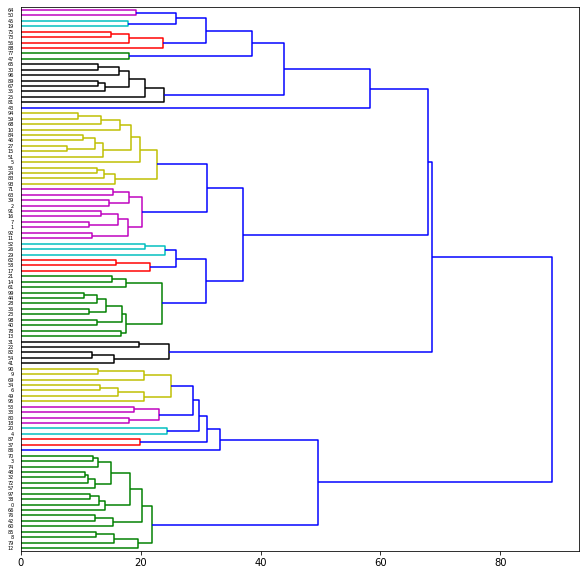

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 10))
dendrogram(link, orientation='right', color_threshold=25)
plt.show()

## Step 5. KNN

In [ ]:
X = np.array([w[1].flatten() for w in wine_review_vectors])
y = np.array([w[3] for w in wine_review_vectors])

In [ ]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.neighbors import NearestNeighbors
# from sklearn.metrics.pairwise import cosine_similarity

# model = NearestNeighbors(n_neighbors=10, metric='manhattan').fit(X)
model = NearestNeighbors(n_neighbors=10, metric='euclidean').fit(X)
# model = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric='cosine').fit(X) # используется в статье

In [ ]:
distances, indices = model.kneighbors(X[34].reshape(1, -1))
print(distances)

[[ 0.         10.68260096 10.68260096 12.00311559 12.14852991 12.275956
  12.34511707 12.62758127 12.86263184 12.9135018 ]]


In [ ]:
indices = indices.flatten()
nearest = y[indices]

In [ ]:
for id in winestyle.iloc[nearest]['id']:
    print(id)
    print(winestyle_upgrade['description'][id] + '\n')
    print(winestyle_filtered['description'][id] + '\n')

150
В освежающем аромате вина чувствуются оттенки белого персика и жимолости. Вино демонстрирует свежий, гармоничный вкус с нотами цитрусовых и экзотических фруктов, тонкой кислинкой и стойким послевкусием. Domaine du Petit Clocher, Sauvignon, Val de Loire IGP — изящное полусухое вино, в производстве которого используется виноград сорта Совиньон Блан. Ягоды произрастают на сланцевых почвах долины Луары. Сбор урожая проводится вручную и механически, на винодельне плоды подвергаются краткой мацерации на кожице в последующей ферментацией в стальных резервуарах. Бутилирование вина проводится в конце декабря. Вино станет прекрасным аперитивом, а также рекомендуется подавать к блюдам из рыбы и другим морепродуктам.

свеж освеж кисл изящн легкотел жимол пол пол стал средн цитрус фрукт ягод виноград персик кож сух полусух бел ван

19382
Вино обладает изящным букетом с нотками цитрусовых, белых цветов, персика и едва различимыми оттенками луговых трав. Вкус вина "Isla Negra" Sauvignon Blanc-Sem

In [ ]:
winestyle_upgrade.iloc[nearest]

,name,type,crop_year,manufacturer,brand,price,volume,rating,country,region,color,grape,sugar,description,normalized_descriptors,review_vector,descriptor_count
id,,,,,,,,,,,,,,,,,
150,"Domaine du Petit Clocher, Sauvignon, Val de Lo...",Вино,2018.0,Domaine du Petit Clocher,NaN,1281.0,0.750,4.25,Франция,Долина Луары,Белое,Совиньон Блан,Полусухое,В освежающем аромате вина чувствуются оттенки ...,"[свеж, освеж, кисл, изящн, легкотел, жимол, по...","[[0.38724703, -0.91827726, 1.2335632, 0.333895...",20
19382,Isla Negra Sauvignon Blanc-Semillon 2011,Вино,2011.0,Isla Negra,Isla Negra,279.0,0.750,2.50,Чили,"Центральная Долина, Долина Рапель",Белое,"Совиньон Блан, Семильон",Полусухое,Вино обладает изящным букетом с нотками цитрус...,"[ярк, цитрус, свеж, освеж, полнотел, вес, изящ...","[[0.74738526, -0.8844779, 1.1052003, 0.2411631...",41
24328,Isla Negra Sauvignon Blanc-Semillon bag in box...,Вино,2011.0,Isla Negra,Isla Negra,916.0,0.003,NaN,Чили,"Центральная Долина, Долина Рапель",Белое,"Совиньон Блан, Семильон",Полусухое,Вино обладает изящным букетом с нотками цитрус...,"[ярк, цитрус, свеж, освеж, полнотел, вес, изящ...","[[0.74738526, -0.8844779, 1.1052003, 0.2411631...",41
27373,Willi Opitz Kiebitz 2008,Вино,2008.0,Willi Opitz,NaN,1486.0,0.750,NaN,Австрия,Бургенланд,Белое,"Шойребе, Пино Гри, Вельшрислинг",Полусухое,"Кибитц имеет свежий, очаровательный аромат с н...","[ярк, цитрус, свеж, ирис, лимон, мед, сот, пол...","[[0.5063334, -1.090277, 1.0368999, 0.0680883, ...",38
15251,"Karl May, Riesling Classic, 2017",Вино,2017.0,Karl May,NaN,1454.0,0.750,NaN,Германия,Рейнхессен,Белое,Рислинг,Полусухое,Освежающий аромат вина раскрывается оттенками ...,"[чист, свеж, освеж, кисл, жимол, мягк, мягк, п...","[[1.0666953, -1.226459, 0.96447253, 0.21979369...",30
5887,"Pampas del Sur, ""Vineyard's Expressions"" Torro...",Вино,NaN,Pampas del Sur,NaN,630.0,0.750,NaN,Аргентина,"Мендоса, Долина Тупунгато",Белое,Торронтес,Полусухое,"Гармоничный, изящный аромат вина раскрывается ...","[свеж, кисл, сильноалкогольн, изящн, элегантн,...","[[0.551284, -0.70510954, 1.1984699, 0.800321, ...",28
16607,"Puklavec & Friends, Riesling Premium, 2018",Вино,2018.0,Puklavec Family Wines,Puklavec & Friends,1116.0,0.750,NaN,Словения,NaN,Белое,Рислинг,Полусухое,"Вино чарует свежим, гармоничным ароматом, сотк...","[цитрус, свеж, кисл, пикантн, элегантн, лимон,...","[[1.1766316, -1.1423059, 1.035181, 0.0686358, ...",29
23452,"Echeverria, ""Hacienda de Molina"" Leyenda Chard...",Вино,2018.0,Echeverria,Hacienda de Molina,794.0,0.750,NaN,Чили,Центральная Долина,Белое,Шардоне,Полусухое,"Элегантный, свежий аромат вина раскрывается от...","[чист, чист, свеж, свеж, сильноалкогольн, слаб...","[[0.5792552, -0.88226277, 0.8645971, 0.6068358...",49
6098,"Connoisseur, ""Le Cheval Marin"" Colombard-Sauvi...",Вино,2018.0,Familles Jegerlehner et Prataviera,Connoisseur,997.0,0.750,NaN,Франция,"Юго-запад Франции, Гасконь",Белое,"Совиньон Блан, Коломбар, Гро Мансенг",Полусухое,Освежающий аромат вина окутывает нотами белых ...,"[кислотн, свеж, свеж, освеж, освеж, кисл, пика...","[[0.4341545, -0.56329674, 0.90941787, 0.968558...",48


## Step 6. Grape analysis

Посчитала и посмотрела какие сорта винограда у нас вообще есть


In [ ]:
dict_grape = Counter(winestyle_upgrade['grape'])


grapes = [key.split(', ') for key in dict_grape.keys() if str(key) != 'nan']
grapes = sum(grapes,[])
grapes = Counter(grapes)
print('У нас есть', len(grapes), 'сорт(ов) винограда. Как дальше жить?')
print(grapes)

most_common = []
for item in grapes.items():
    if item[1] > 50:
        most_common.append(item[0])
print(len(most_common))
most_common

У нас есть 704 сорт(ов) винограда. Как дальше жить?
Counter({'Каберне Совиньон': 559, 'Шардоне': 476, 'Мерло': 459, 'Сира': 413, 'Совиньон Блан': 319, 'Гренаш/Гарнача': 300, 'Санджовезе': 198, 'Рислинг': 188, 'Каберне Фран': 172, 'Пино Нуар': 172, 'Шираз': 151, 'Пти Вердо': 144, 'Красные сорта винограда': 142, 'Турига Насьональ': 132, 'Вионье': 132, 'Темпранильо': 126, 'Мальбек': 124, 'Кариньяно': 122, 'Мурведр': 108, 'Алиготе': 106, 'Пино Блан': 105, 'Белые сорта винограда': 99, 'Сенсо': 98, 'Мускат': 96, 'Мальвазия': 96, 'Другие сорта': 95, 'Корвина': 93, 'Тинта Рориз': 88, 'Гренаш Блан': 87, 'Треббьяно': 84, 'Ркацители': 82, 'Саперави': 82, 'Турига Франсеса/Турига Франка': 80, 'Аликанте': 80, 'Макабео': 74, 'Семильон': 73, 'Шенен Блан': 73, 'Аринту': 71, 'Рондинелла': 70, 'Карменере': 64, 'Гарганега': 63, 'Руссан': 62, 'Верментино': 61, 'Уни Блан': 58, 'Кларет': 56, 'Барбера': 55, 'Траминер': 55, 'Пино Бьянко': 55, 'Канайоло': 53, 'Пино Гриджио': 52, 'Коломбар': 51, 'Пино Гри': 48, 

['Мерло',
 'Темпранильо',
 'Гренаш/Гарнача',
 'Санджовезе',
 'Сира',
 'Кариньяно',
 'Каберне Совиньон',
 'Каберне Фран',
 'Совиньон Блан',
 'Мускат',
 'Верментино',
 'Рислинг',
 'Пти Вердо',
 'Ркацители',
 'Пино Нуар',
 'Мальбек',
 'Сенсо',
 'Семильон',
 'Аринту',
 'Шираз',
 'Турига Насьональ',
 'Турига Франсеса/Турига Франка',
 'Тинта Рориз',
 'Красные сорта винограда',
 'Корвина',
 'Пино Гриджио',
 'Белые сорта винограда',
 'Саперави',
 'Рондинелла',
 'Барбера',
 'Алиготе',
 'Гренаш Блан',
 'Мальвазия',
 'Шардоне',
 'Гарганега',
 'Вионье',
 'Уни Блан',
 'Коломбар',
 'Пино Блан',
 'Карменере',
 'Аликанте',
 'Мурведр',
 'Канайоло',
 'Траминер',
 'Треббьяно',
 'Шенен Блан',
 'Макабео',
 'Другие сорта',
 'Руссан',
 'Кларет',
 'Пино Бьянко']

In [ ]:
def subset_wine_vectors(list_of_varieties):
    wine_variety_vectors = []
    for v in list_of_varieties:
        one_var_only = winestyle_upgrade.loc[winestyle_upgrade['grape'] == v]
        review_arrays = one_var_only['review_vector'].apply(lambda x: x[0])
        average_variety_vec = np.average(review_arrays)
        wine_variety_vector = [v, average_variety_vec]
        wine_variety_vectors.append(wine_variety_vector)
    return wine_variety_vectors

def pca_wine_variety(list_of_varieties):
    wine_var_vectors = subset_wine_vectors(list_of_varieties)
    pca = PCA(n_components=2)
    pca.fit([w[1] for w in wine_var_vectors])  
    pca_dataset = pca.fit_transform([w[1] for w in wine_var_vectors])
    pca_dataframe = pd.DataFrame(pca_dataset, columns=['pca_1', 'pca_2'])
    pca_dataframe.index = [w[0] for w in wine_var_vectors]
    # print(pca_dataframe)
    return pca_dataframe

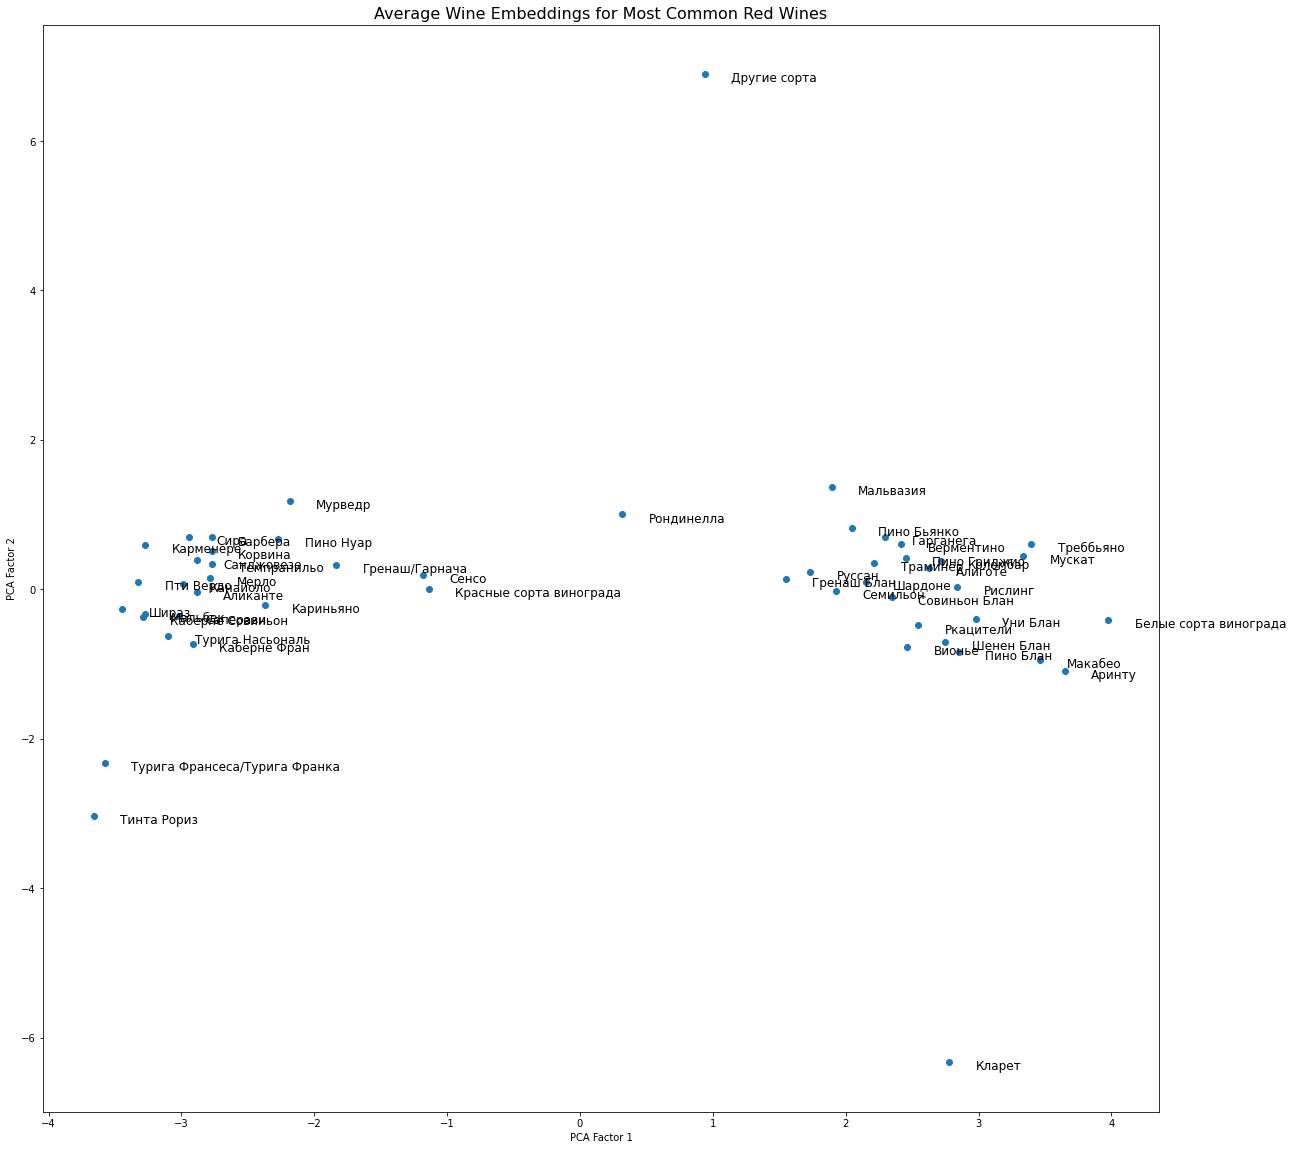

In [ ]:
from sklearn.decomposition import PCA
pca_r_dataframe = pca_wine_variety(most_common)
plt.figure(figsize=(20, 20))
plt.scatter(x=pca_r_dataframe['pca_1'], y=pca_r_dataframe['pca_2'])
for i, txt in enumerate(pca_r_dataframe.index):
    plt.annotate(txt, (list(pca_r_dataframe['pca_1'])[i]+0.2, list(pca_r_dataframe['pca_2'])[i]-0.1), fontsize=12)

plt.xlabel('PCA Factor 1')
plt.ylabel('PCA Factor 2')
plt.title('Average Wine Embeddings for Most Common Red Wines', fontsize=16)
plt.show()